# Analysis of dataset
## 1. Data preprocessing

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

%matplotlib inline

In [36]:
df = pd.read_excel("./data/form_responses.xlsx", engine="openpyxl")
display(df, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Отметка времени                                656 non-null    datetime64[ns]
 1   Unnamed: 1                                     655 non-null    object        
 2   Группа                                         655 non-null    object        
 3   Работаете?                                     651 non-null    object        
 4   Если, работаете, то где?                       248 non-null    object        
 5   Должность                                      226 non-null    object        
 6   Прикрепите справку с места работы (если есть)  36 non-null     object        
 7   Если планируете в магистратуру, то куда?       79 non-null     object        
dtypes: datetime64[ns](1), object(7)
memory usage: 41.1+ KB


,Отметка времени,Unnamed: 1,Группа,Работаете?,"Если, работаете, то где?",Должность,Прикрепите справку с места работы (если есть),"Если планируете в магистратуру, то куда?"
0,2024-06-12 15:15:30.309,Абаева Арайлым Канышовна,Software engineering 2113,Нет,NaN,NaN,NaN,NaN
1,2024-06-12 12:23:00.778,Абай Аяжан Даулетқызы,Bda-2105,Да,Epam Systems,Data analyst,NaN,NaN
2,2024-06-13 16:05:17.640,Абаш Әлия Адилхатқызы,CS-2119,Нет,NaN,NaN,NaN,NaN
3,2024-06-13 14:14:42.862,Абдазим Алимжан,MT2102,NaN,NaN,NaN,NaN,NaN
4,2024-06-12 12:05:39.552,Абдикенов Нуржас Нұрсабитұлы,BDA-2103,Нет,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
651,2024-08-14 14:34:55.252,Сабирова Карина Анваровна,CS-2112,Да,"Школа Актёрского Мастерства ""Как В Кино""",Менеджер по Продажам,https://drive.google.com/open?id=187aJmtfYJIDN...,Не планирую пока
652,2024-08-17 14:57:32.131,Алекенов Серікболат Сакенұлы,MT-2105,Да,ARTSPACE,Заместитель директор,https://drive.google.com/open?id=1JkMKaoUBXlOy...,Astana IT University
653,2024-08-21 09:00:39.544,Алекенов Еркебұлан Сакенұлы,MT-2105,Да,ИП “ARTSPACE”,Директор,https://drive.google.com/open?id=12QzalWlaj-Yd...,NaN
654,2024-08-29 23:44:27.778,Калиматов Акжан Самалович,SE-2109,Да,Thirteen Lab,CEO,NaN,Зарубеж


None

In [37]:
# rename / change columns to short english names and fix unnamed column
df = df.set_axis(
    ["timestamp", "full_name", "group", "is_working", "workplace", "position", "certification", "masters_degree"],
    axis="columns"
)

In [38]:
# drop certification column because there is issue with access to source files
df = df.drop(["certification"], axis=1)

In [39]:
# handle NaN values in is_working column
display(df[df["is_working"].isna()])

def handle_nan_values(row):
    if pd.isna(row['is_working']):
        if pd.notna(row['workplace']) or pd.notna(row['position']):
            return 1
        else:
            return 0
    else:
        return row["is_working"]

df["is_working"] = df.apply(handle_nan_values, axis=1)

display(df["is_working"].unique(), df.loc[[3, 21, 320, 604, 633]])

,timestamp,full_name,group,is_working,workplace,position,masters_degree
3,2024-06-13 14:14:42.862,Абдазим Алимжан,MT2102,NaN,NaN,NaN,NaN
21,2024-06-18 12:55:54.150,Айдарбек Бекзат Бағдатұлы,Cs2105,NaN,NaN,NaN,NaN
320,2024-06-12 14:26:28.464,Мамиева Томирис Геворговна,IT-2103,NaN,ИП Туленова Ж.Ж.,Бухгалтер,NaN
604,2024-06-25 12:23:24.270,Амангали Мұратали Асылбекұлы,SE-2107,NaN,TOO KAZGISA,junior java developer,Astana IT University
633,2024-06-25 16:47:44.396,Мейрханова Алма Советхановна,Bda-2105,NaN,NaN,NaN,Зарубеж


array(['Нет', 'Да', 0, 1], dtype=object)

,timestamp,full_name,group,is_working,workplace,position,masters_degree
3,2024-06-13 14:14:42.862,Абдазим Алимжан,MT2102,0,NaN,NaN,NaN
21,2024-06-18 12:55:54.150,Айдарбек Бекзат Бағдатұлы,Cs2105,0,NaN,NaN,NaN
320,2024-06-12 14:26:28.464,Мамиева Томирис Геворговна,IT-2103,1,ИП Туленова Ж.Ж.,Бухгалтер,NaN
604,2024-06-25 12:23:24.270,Амангали Мұратали Асылбекұлы,SE-2107,1,TOO KAZGISA,junior java developer,Astana IT University
633,2024-06-25 16:47:44.396,Мейрханова Алма Советхановна,Bda-2105,0,NaN,NaN,Зарубеж


In [40]:
# change "is_working" column values to bool
df["is_working"] = df["is_working"].replace(["Да", "Нет"], [1, 0])
df.astype({'is_working': 'bool'}).dtypes

display(df["is_working"].unique(), df)

/tmp/ipykernel_22548/3158113414.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



array([0, 1])

,timestamp,full_name,group,is_working,workplace,position,masters_degree
0,2024-06-12 15:15:30.309,Абаева Арайлым Канышовна,Software engineering 2113,0,NaN,NaN,NaN
1,2024-06-12 12:23:00.778,Абай Аяжан Даулетқызы,Bda-2105,1,Epam Systems,Data analyst,NaN
2,2024-06-13 16:05:17.640,Абаш Әлия Адилхатқызы,CS-2119,0,NaN,NaN,NaN
3,2024-06-13 14:14:42.862,Абдазим Алимжан,MT2102,0,NaN,NaN,NaN
4,2024-06-12 12:05:39.552,Абдикенов Нуржас Нұрсабитұлы,BDA-2103,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
651,2024-08-14 14:34:55.252,Сабирова Карина Анваровна,CS-2112,1,"Школа Актёрского Мастерства ""Как В Кино""",Менеджер по Продажам,Не планирую пока
652,2024-08-17 14:57:32.131,Алекенов Серікболат Сакенұлы,MT-2105,1,ARTSPACE,Заместитель директор,Astana IT University
653,2024-08-21 09:00:39.544,Алекенов Еркебұлан Сакенұлы,MT-2105,1,ИП “ARTSPACE”,Директор,NaN
654,2024-08-29 23:44:27.778,Калиматов Акжан Самалович,SE-2109,1,Thirteen Lab,CEO,Зарубеж


In [41]:
# handle other columns with NaN values
# текстовые поля для NLP анализа: группа, имя, если работаете то где, должность, если мага то куда
# TODO: rewrite lambda function to just functions

# 1. NaN within full_name column
# - convert NaN to "Unknown" or "Anonymous"
# - TODO: convert inappropriate value / empty values (полупустыми или неверными данными like "-")
df["full_name"] = df.apply(
    lambda row: "Unknown" if pd.isna(row["full_name"]) else row["full_name"],
    axis=1
)

# 2. NaN within group column
# - convert NaN to "Unknown"
df["group"] = df.apply(
    lambda row: "Unknown" if pd.isna(row["group"]) else row["group"],
    axis=1
)

# 3. NaN workplace
# - convert NaN to "Unknown" if only is_working == 1
df["workplace"] = df.apply(
    # and row["is_working"] == 1
    lambda row: "Unknown" if pd.isna(row["workplace"]) else row["workplace"],
    axis=1
)

# 4. NaN position
# - convert NaN to "Unknown" if only is_working == 1
df["position"] = df.apply(
    # and row["is_working"] == 1 
    lambda row: "Unknown" if pd.isna(row["position"]) else row["position"],
    axis=1
)

# 5. NaN masters_degree
# - convert NaN to "Unknown"
df["masters_degree"] = df.apply(
    lambda row: "Unknown" if pd.isna(row["masters_degree"]) else row["masters_degree"],
    axis=1
)

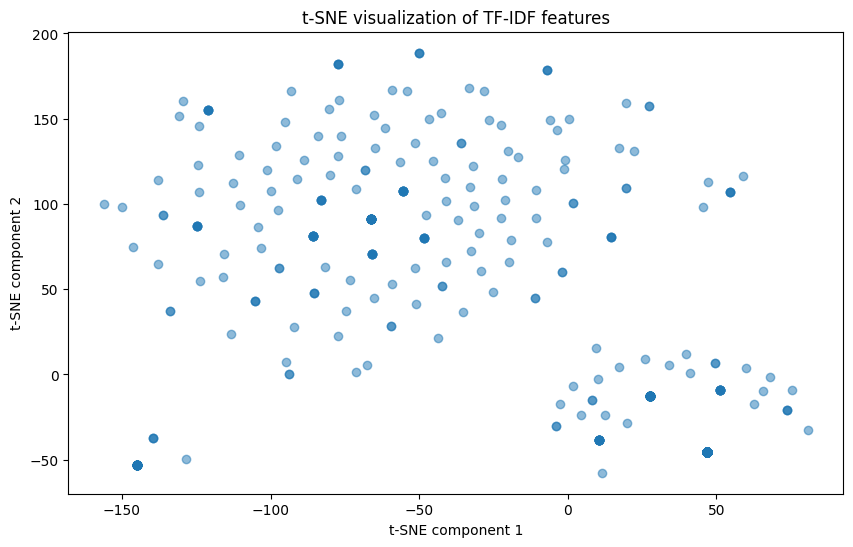

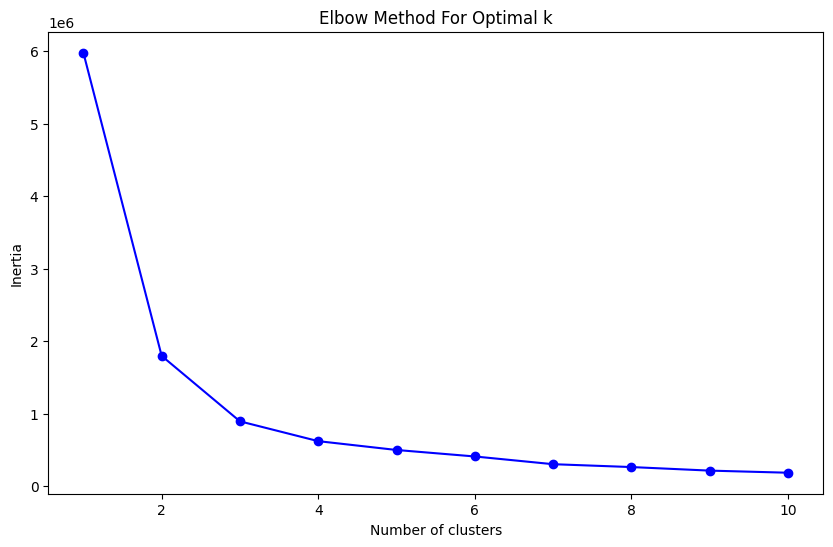

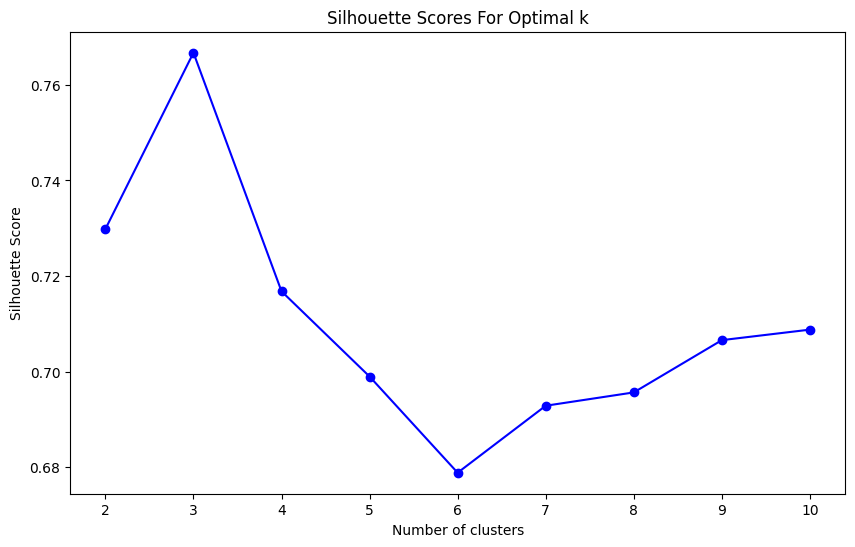

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["workplace"])
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], alpha=0.5)
plt.title('t-SNE visualization of TF-IDF features')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()
# Reduce dimensions with t-SNE to 3 components
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for 3D t-SNE results
tsne_df_3d = pd.DataFrame(tsne_results_3d, columns=['tsne1', 'tsne2', 'tsne3'])

# 2D t-SNE plot
fig_2d = px.scatter(
    tsne_df,
    hover_data=[df['workplace']],
    x='tsne1', y='tsne2',
    title='2D t-SNE visualization of TF-IDF features'
)
fig_2d.update_traces(mode="markers")
fig_2d.show()

# 3D t-SNE plot
fig_3d = go.Figure(data=[go.Scatter3d(
    x=tsne_df_3d['tsne1'],
    y=tsne_df_3d['tsne2'],
    z=tsne_df_3d['tsne3'],
    mode='markers+text',
    # text=df['workplace'],
    marker=dict(size=5, opacity=0.8)
)])
fig_3d.update_layout(
    title='3D t-SNE visualization of TF-IDF features',
    scene=dict(
        xaxis_title='t-SNE component 1',
        yaxis_title='t-SNE component 2',
        zaxis_title='t-SNE component 3'
    )
)
fig_3d.show()
# Use the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_results)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(tsne_results, kmeans.labels_))

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal k')
plt.show()

# Choose the optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(tsne_results)

# 2D t-SNE plot with clusters
fig_2d = px.scatter(
    tsne_df,
    hover_data=[df['workplace']],
    x='tsne1', y='tsne2',
    color=df['cluster'].astype(str),
    title='2D t-SNE visualization of TF-IDF features with K-Means clusters'
)
fig_2d.update_traces(mode="markers")
fig_2d.show()

# 3D t-SNE plot with clusters
fig_3d = go.Figure(data=[go.Scatter3d(
    x=tsne_df_3d['tsne1'],
    y=tsne_df_3d['tsne2'],
    z=tsne_df_3d['tsne3'],
    mode='markers',
    marker=dict(size=5, opacity=0.8, color=df['cluster'], colorscale='Viridis')
)])
fig_3d.update_layout(
    title='3D t-SNE visualization of TF-IDF features with K-Means clusters',
    scene=dict(
        xaxis_title='t-SNE component 1',
        yaxis_title='t-SNE component 2',
        zaxis_title='t-SNE component 3'
    )
)
fig_3d.show()

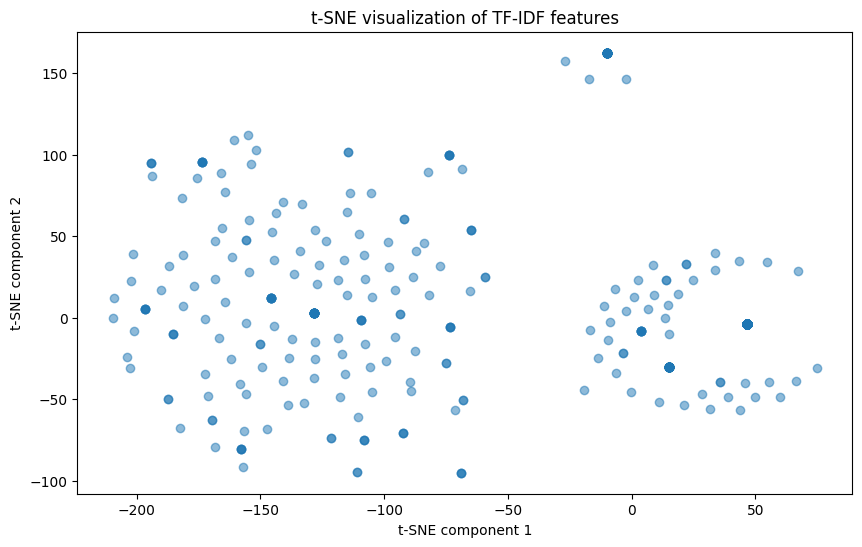

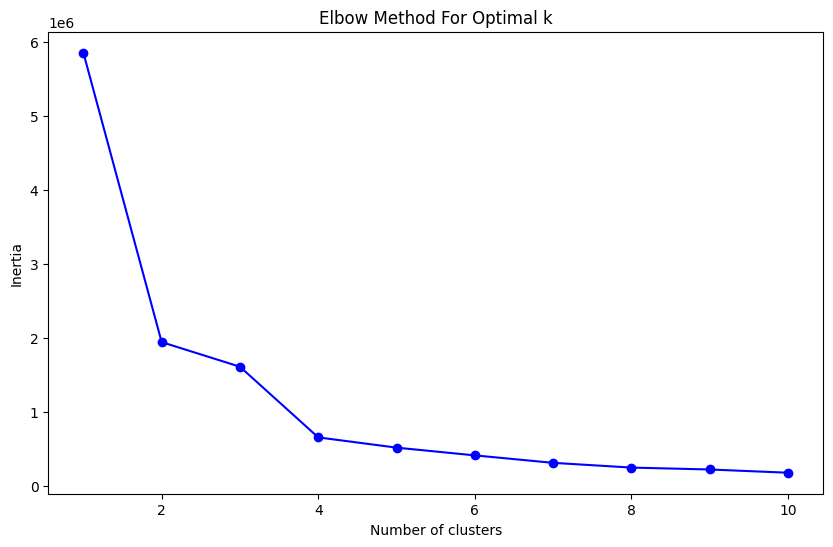

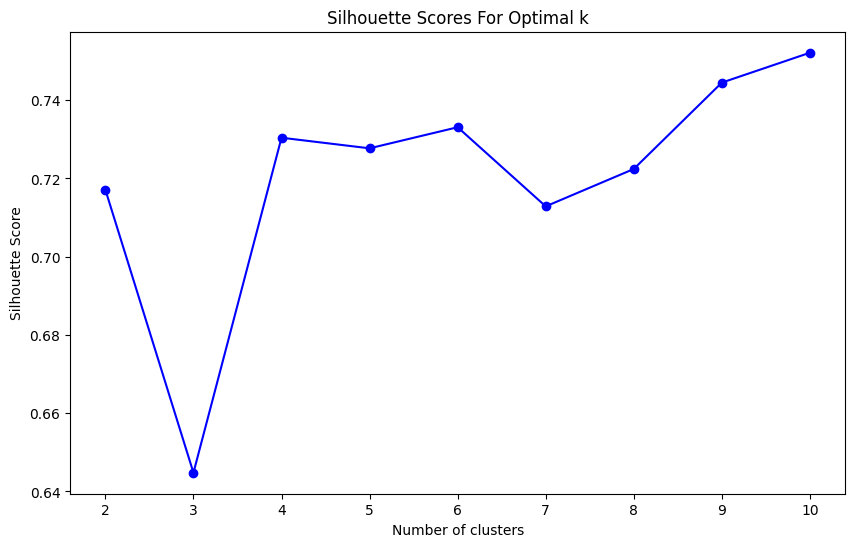

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["position"])
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], alpha=0.5)
plt.title('t-SNE visualization of TF-IDF features')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()
# Reduce dimensions with t-SNE to 3 components
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for 3D t-SNE results
tsne_df_3d = pd.DataFrame(tsne_results_3d, columns=['tsne1', 'tsne2', 'tsne3'])

# 2D t-SNE plot
fig_2d = px.scatter(
    tsne_df,
    hover_data=[df['position']],
    x='tsne1', y='tsne2',
    title='2D t-SNE visualization of TF-IDF features'
)
fig_2d.update_traces(mode="markers")
fig_2d.show()

# 3D t-SNE plot
fig_3d = go.Figure(data=[go.Scatter3d(
    x=tsne_df_3d['tsne1'],
    y=tsne_df_3d['tsne2'],
    z=tsne_df_3d['tsne3'],
    mode='markers+text',
    # text=df['workplace'],
    marker=dict(size=5, opacity=0.8)
)])
fig_3d.update_layout(
    title='3D t-SNE visualization of TF-IDF features',
    scene=dict(
        xaxis_title='t-SNE component 1',
        yaxis_title='t-SNE component 2',
        zaxis_title='t-SNE component 3'
    )
)
fig_3d.show()
# Use the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_results)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(tsne_results, kmeans.labels_))

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal k')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(tsne_results)

# 2D t-SNE plot with clusters
fig_2d = px.scatter(
    tsne_df,
    hover_data=[df['position']],
    x='tsne1', y='tsne2',
    color=df['cluster'].astype(str),
    title='2D t-SNE visualization of TF-IDF features with K-Means clusters'
)
fig_2d.update_traces(mode="markers")
fig_2d.show()

# 3D t-SNE plot with clusters
fig_3d = go.Figure(data=[go.Scatter3d(
    x=tsne_df_3d['tsne1'],
    y=tsne_df_3d['tsne2'],
    z=tsne_df_3d['tsne3'],
    mode='markers',
    marker=dict(size=5, opacity=0.8, color=df['cluster'], colorscale='Viridis')
)])
fig_3d.update_layout(
    title='3D t-SNE visualization of TF-IDF features with K-Means clusters',
    scene=dict(
        xaxis_title='t-SNE component 1',
        yaxis_title='t-SNE component 2',
        zaxis_title='t-SNE component 3'
    )
)
fig_3d.show()

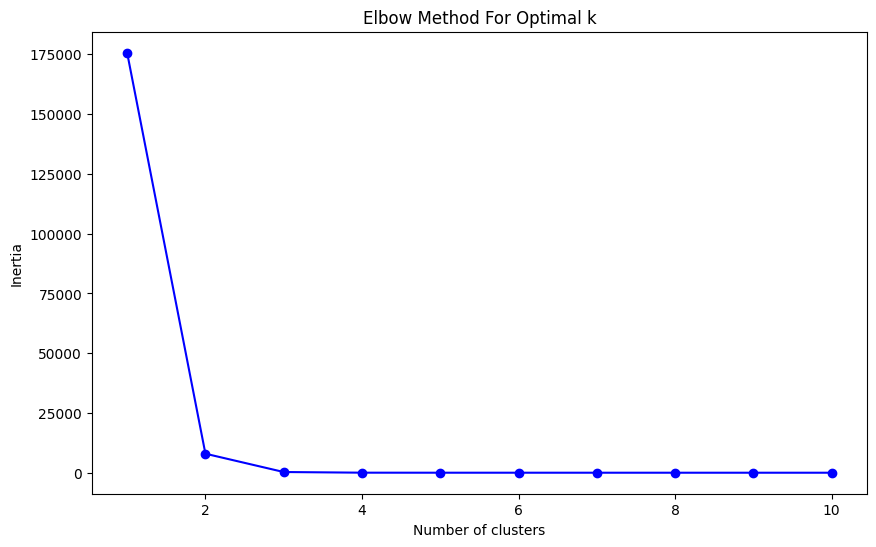

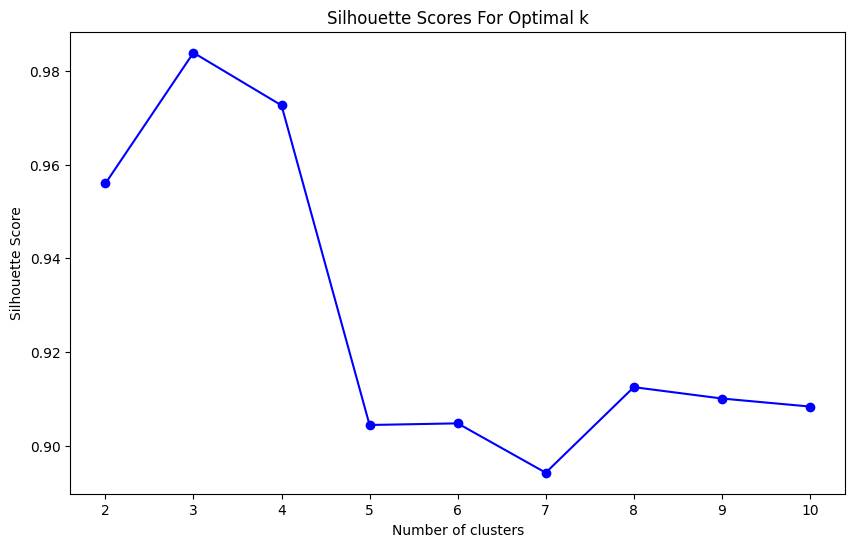

cluster
0    [Unknown, Unknown, Unknown, Unknown, Unknown, ...
1    [Data analyst , Security Operation Center Anal...
2    [Нет, Нет, Нет, Нет, Нет, Нет, Нет, Нет, Нет ,...
3    [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...
4    [Опер по крипте , Бекенд разработчик, Бизнес а...
5    [C1 - RPA developer, Специалист 3 категории - ...
6    [Junior backend developer , Ведущий разработчи...
Name: position, dtype: object


In [50]:
import pandas as pd
from rank_bm25 import BM25Okapi
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA

# Tokenize positions for BM25
tokenized_positions = [pos.split() for pos in df['position']]

# Initialize BM25 model
bm25 = BM25Okapi(tokenized_positions)

# Compute BM25 scores for each position pair
scores_matrix = []
for position in tokenized_positions:
    scores = bm25.get_scores(position)
    scores_matrix.append(scores)

# Convert BM25 scores matrix to a DataFrame
scores_matrix = np.array(scores_matrix)
bm25_df = pd.DataFrame(scores_matrix, columns=df['position'], index=df['position'])

# Dimensionality reduction for clustering

pca = PCA(n_components=2)
reduced_scores = pca.fit_transform(scores_matrix)

# Use the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_scores)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(reduced_scores, kmeans.labels_))


plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal k')
plt.show()

optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_scores)

# Add clusters to the original DataFrame
df['cluster'] = clusters

# Visualize clusters
fig = px.scatter(
    x=reduced_scores[:, 0],
    y=reduced_scores[:, 1],
    color=df['cluster'].astype(str),
    text=df['position'],
    title='BM25-Based Semantic Clustering of Positions',
    labels={'x': 'Component 1', 'y': 'Component 2'}
)
fig.update_traces(marker=dict(size=10), textposition='top center')
fig.show()

# Print clustered groups
grouped = df.groupby('cluster')['position'].apply(list)
print(grouped)

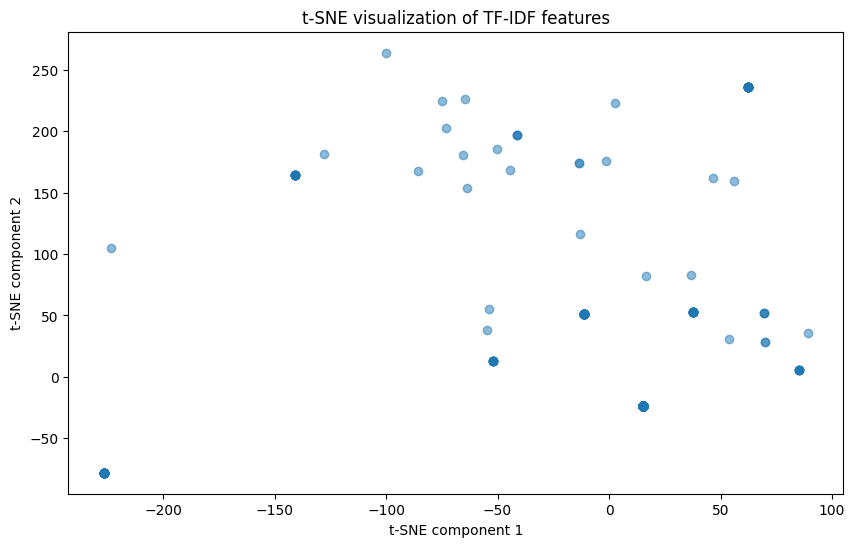

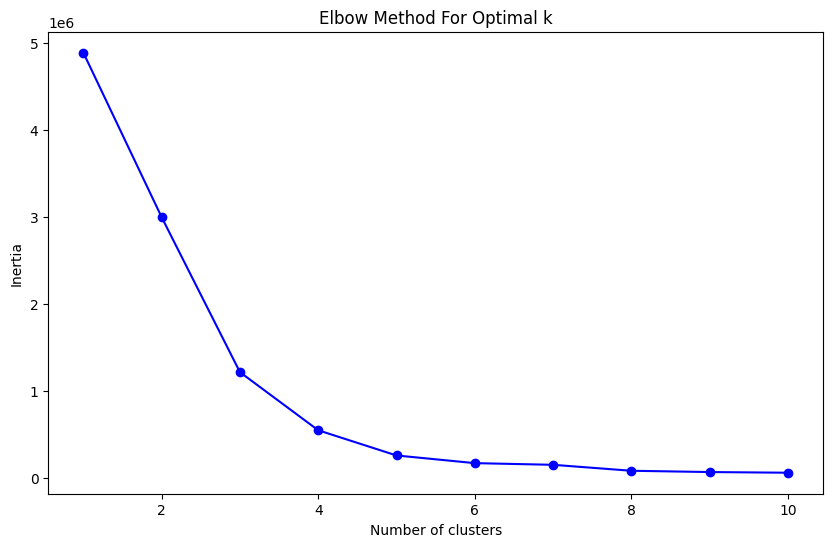

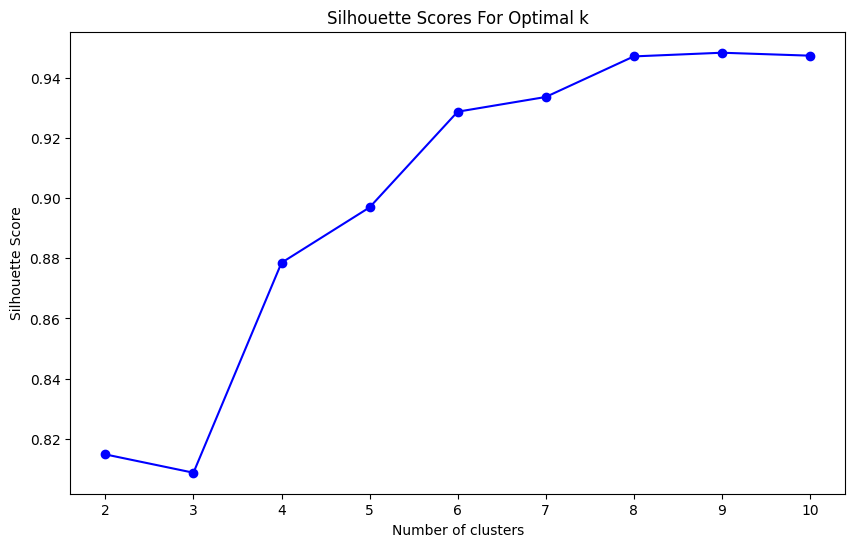

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["masters_degree"])
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], alpha=0.5)
plt.title('t-SNE visualization of TF-IDF features')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()
# Reduce dimensions with t-SNE to 3 components
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for 3D t-SNE results
tsne_df_3d = pd.DataFrame(tsne_results_3d, columns=['tsne1', 'tsne2', 'tsne3'])

# 2D t-SNE plot
fig_2d = px.scatter(
    tsne_df,
    hover_data=[df["masters_degree"]],
    x='tsne1', y='tsne2',
    title='2D t-SNE visualization of TF-IDF features'
)
fig_2d.update_traces(mode="markers")
fig_2d.show()

# 3D t-SNE plot
fig_3d = go.Figure(data=[go.Scatter3d(
    x=tsne_df_3d['tsne1'],
    y=tsne_df_3d['tsne2'],
    z=tsne_df_3d['tsne3'],
    mode='markers+text',
    # text=df['workplace'],
    marker=dict(size=5, opacity=0.8)
)])
fig_3d.update_layout(
    title='3D t-SNE visualization of TF-IDF features',
    scene=dict(
        xaxis_title='t-SNE component 1',
        yaxis_title='t-SNE component 2',
        zaxis_title='t-SNE component 3'
    )
)
fig_3d.show()
# Use the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_results)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(tsne_results, kmeans.labels_))

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal k')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(tsne_results)

# 2D t-SNE plot with clusters
fig_2d = px.scatter(
    tsne_df,
    hover_data=[df["masters_degree"]],
    x='tsne1', y='tsne2',
    color=df['cluster'].astype(str),
    title='2D t-SNE visualization of TF-IDF features with K-Means clusters'
)
fig_2d.update_traces(mode="markers")
fig_2d.show()

# 3D t-SNE plot with clusters
fig_3d = go.Figure(data=[go.Scatter3d(
    x=tsne_df_3d['tsne1'],
    y=tsne_df_3d['tsne2'],
    z=tsne_df_3d['tsne3'],
    mode='markers',
    marker=dict(size=5, opacity=0.8, color=df['cluster'], colorscale='Viridis')
)])
fig_3d.update_layout(
    title='3D t-SNE visualization of TF-IDF features with K-Means clusters',
    scene=dict(
        xaxis_title='t-SNE component 1',
        yaxis_title='t-SNE component 2',
        zaxis_title='t-SNE component 3'
    )
)
fig_3d.show()

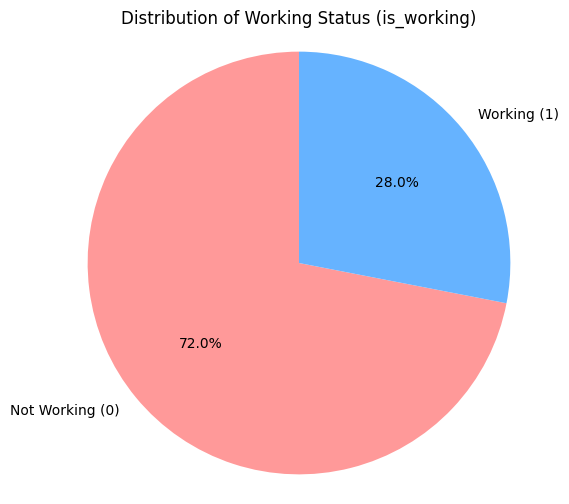

In [57]:
counts = df['is_working'].value_counts(normalize=True) * 100
labels = ['Not Working (0)', 'Working (1)']
sizes = [counts[0], counts[1]]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff']
)
plt.title('Distribution of Working Status (is_working)')
plt.axis('equal')
plt.show()

In [ ]:
# предобработка текста - нормализация текста - Отправлять тексты батчами (по 20 штук или по 10) за раз и в промте это указывать

# Очистка текста
# def preprocess_text(text):
#     stop_words = set(stopwords.words('russian') + stopwords.words('english'))
#     tokens = word_tokenize(text.lower())
#     tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
#     return ' '.join(tokens)

# df['processed_text'] = df['combined_text'].apply(preprocess_text)

# from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")
# tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

# prompt = """
# Convert and normalize provided text like in 
# Examples: 'Software Engineering 2103' -> "SE-2103", "Cybersecurity 2103" -> "CS-2103"
# Provided text: "software engineering 2103"
# Output:
# """

# # to format like in examples
# # "ABBREVIATION_GROUP_TITLE-GROUP_NUMBER"

# inputs = tokenizer(prompt, return_tensors="pt")
# outputs = model.generate(**inputs)
# print(tokenizer.batch_decode(outputs, skip_special_tokens=True))